In [86]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import datetime

import sys
sys.path.append('../../')

from models.seir import SIRD, SEIR_Testing

from main.seir.fitting import get_variable_param_ranges, single_fitting_cycle

from data.dataloader import Covid19IndiaLoader
from data.processing import get_dataframes_cached

from utils.loss import Loss_Calculator

In [88]:
loader = Covid19IndiaLoader()
# dataframes = loader.get_covid19india_api_data()
dataframes = get_dataframes_cached()

../../cache/dataframes_ts_08072020.pkl


In [89]:
predictions_dict = {}

In [90]:
districts_to_show = [('Maharashtra', 'Pune')]

In [91]:
filename = '../../data/data/mumbai/case_summary_expanded_2006.csv'
filename = None
data_from_tracker = False

In [92]:
lc = Loss_Calculator()

### Recovered and deceased

In [93]:
variable_param_ranges = {
    'lockdown_R0': (1, 1.5),
    'T_inc': (4, 8),
    'T_inf': (4, 7),
    'T_fatal': (1, 70),
    'I_hosp_ratio': (0, 1)
}
variable_param_ranges = get_variable_param_ranges(variable_param_ranges)
which_compartments=['deceased', 'recovered']

Performing m1 fit ..
fetching from athenadb...
splitting data ..
splitting data ..
train
           state district       date  total_infected  hospitalised  recovered  \
50  maharashtra     pune 2020-06-10          8527.0        2565.4     5554.0   
51  maharashtra     pune 2020-06-11          8781.8        2630.2     5734.4   
52  maharashtra     pune 2020-06-12          9072.0        2730.2     5915.6   
53  maharashtra     pune 2020-06-13          9348.2        2821.8     6089.8   
54  maharashtra     pune 2020-06-14          9629.4        2929.0     6252.6   

    deceased  
50     407.6  
51     417.2  
52     426.2  
53     436.6  
54     447.8  
val
          state district       date  total_infected  hospitalised  recovered  \
0  maharashtra     pune 2020-06-15          9941.6        3072.2     6410.4   
1  maharashtra     pune 2020-06-16         10297.4        3254.6     6574.2   
2  maharashtra     pune 2020-06-17         10659.2        3436.8     6744.8   
3  maharashtra    

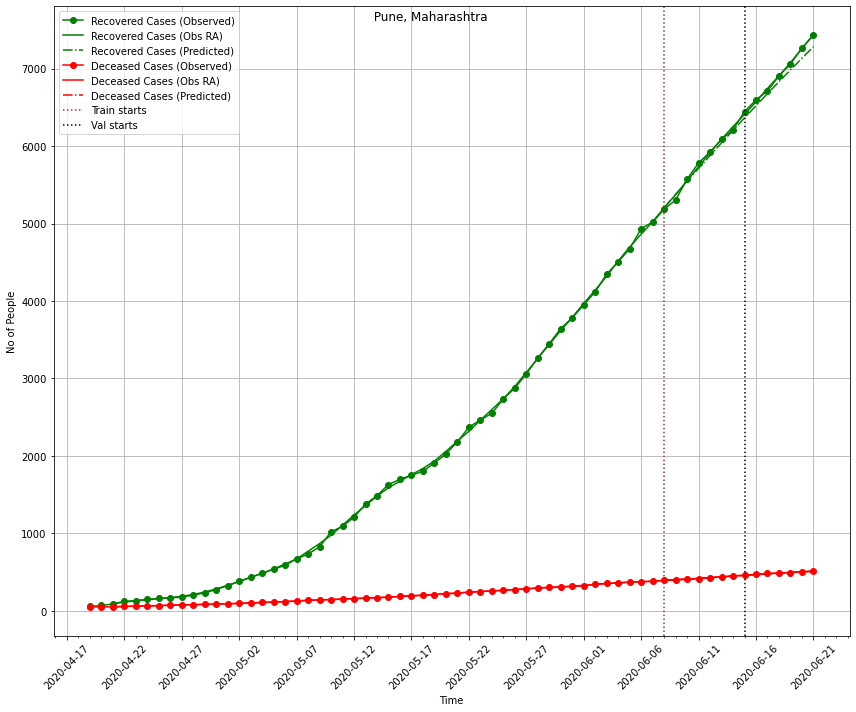

In [94]:
for state, district in districts_to_show:
    predictions_dict[(state, district)] = {}
    predictions_dict[(state, district)]['m1'] = single_fitting_cycle(
        dataframes, state, district, data_from_tracker=data_from_tracker, granular_data=False, filename=filename, #Data
        model=SIRD, variable_param_ranges=variable_param_ranges, #Choose Model and Ranges
        train_period=7, val_period=7, num_evals=1000, initialisation='intermediate', #Optimisation related parameters
        which_compartments=which_compartments, #Compartments to Apply Loss on 
        smooth_jump=False, smoothing_length=33, smoothing_method='weighted') #Smoothing
    
    predictions_dict[(state, district)]['state'] = state
    predictions_dict[(state, district)]['dist'] = district
    predictions_dict[(state, district)]['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    predictions_dict[(state, district)]['datasource'] = 'covid19api' if predictions_dict[(state, district)]['m1']['data_from_tracker'] else 'municipality'
    predictions_dict[(state, district)]['variable_param_ranges'] = predictions_dict[(state, district)]['m1']['variable_param_ranges']

In [95]:
lc.create_loss_dataframe_master(predictions_dict, 'm1')

train                val          
                 deceased recovered deceased recovered
Maharashtra Pune     0.69      0.72     0.56      1.29

Performing m1 fit ..
fetching from athenadb...
splitting data ..
splitting data ..
train
           state district       date  total_infected  hospitalised  recovered  \
50  maharashtra     pune 2020-06-10          8527.0        2565.4     5554.0   
51  maharashtra     pune 2020-06-11          8781.8        2630.2     5734.4   
52  maharashtra     pune 2020-06-12          9072.0        2730.2     5915.6   
53  maharashtra     pune 2020-06-13          9348.2        2821.8     6089.8   
54  maharashtra     pune 2020-06-14          9629.4        2929.0     6252.6   

    deceased  
50     407.6  
51     417.2  
52     426.2  
53     436.6  
54     447.8  
val
          state district       date  total_infected  hospitalised  recovered  \
0  maharashtra     pune 2020-06-15          9941.6        3072.2     6410.4   
1  maharashtra     pune 2020-06-16         10297.4        3254.6     6574.2   
2  maharashtra     pune 2020-06-17         10659.2        3436.8     6744.8   
3  maharashtra    

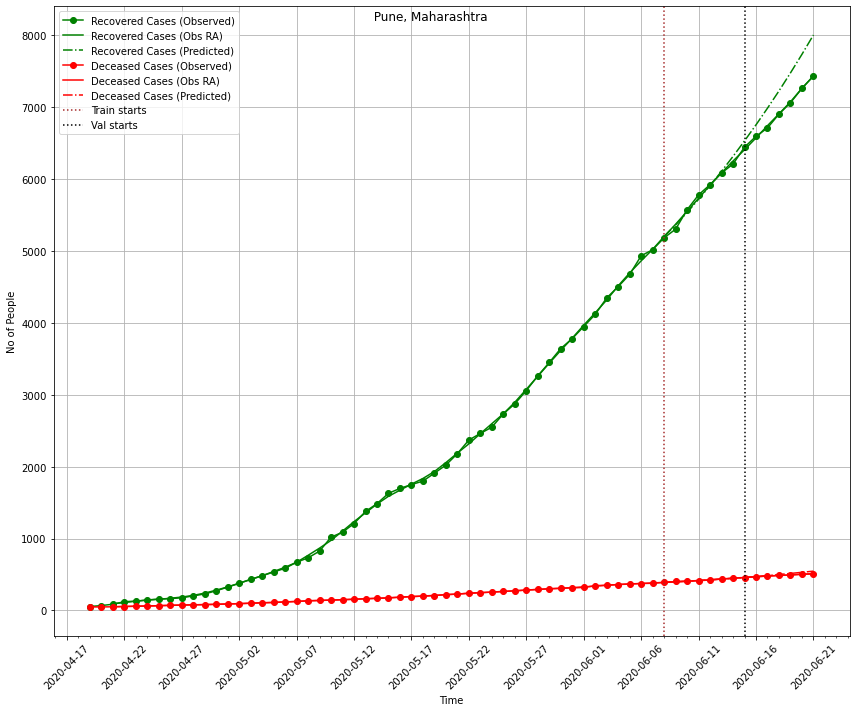

In [96]:
for state, district in districts_to_show:
    predictions_dict[(state, district)] = {}
    predictions_dict[(state, district)]['m1'] = single_fitting_cycle(
        dataframes, state, district, data_from_tracker=data_from_tracker, granular_data=False, filename=filename, #Data
        model=SEIR_Testing, variable_param_ranges=None, #Choose Model and Ranges
        train_period=7, val_period=7, num_evals=1000, initialisation='intermediate', #Optimisation related parameters
        which_compartments=which_compartments, #Compartments to Apply Loss on 
        smooth_jump=False, smoothing_length=33, smoothing_method='weighted') #Smoothing
    
    predictions_dict[(state, district)]['state'] = state
    predictions_dict[(state, district)]['dist'] = district
    predictions_dict[(state, district)]['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    predictions_dict[(state, district)]['datasource'] = 'covid19api' if predictions_dict[(state, district)]['m1']['data_from_tracker'] else 'municipality'
    predictions_dict[(state, district)]['variable_param_ranges'] = predictions_dict[(state, district)]['m1']['variable_param_ranges']

In [97]:
lc.create_loss_dataframe_master(predictions_dict, 'm1')

train                val          
                 deceased recovered deceased recovered
Maharashtra Pune     0.45      0.79     2.97      4.41

### All compartments

In [98]:
variable_param_ranges = {
    'lockdown_R0': (1, 2),
    'T_inc': (4, 10),
    'T_inf': (4, 40),
    'T_fatal': (1, 400),
    'I_hosp_ratio': (0, 2)
}
variable_param_ranges = get_variable_param_ranges(variable_param_ranges)
which_compartments=['hospitalised', 'total_infected', 'deceased', 'recovered']

Performing m1 fit ..
fetching from athenadb...
splitting data ..
splitting data ..
train
           state district       date  total_infected  hospitalised  recovered  \
50  maharashtra     pune 2020-06-10          8527.0        2565.4     5554.0   
51  maharashtra     pune 2020-06-11          8781.8        2630.2     5734.4   
52  maharashtra     pune 2020-06-12          9072.0        2730.2     5915.6   
53  maharashtra     pune 2020-06-13          9348.2        2821.8     6089.8   
54  maharashtra     pune 2020-06-14          9629.4        2929.0     6252.6   

    deceased  
50     407.6  
51     417.2  
52     426.2  
53     436.6  
54     447.8  
val
          state district       date  total_infected  hospitalised  recovered  \
0  maharashtra     pune 2020-06-15          9941.6        3072.2     6410.4   
1  maharashtra     pune 2020-06-16         10297.4        3254.6     6574.2   
2  maharashtra     pune 2020-06-17         10659.2        3436.8     6744.8   
3  maharashtra    

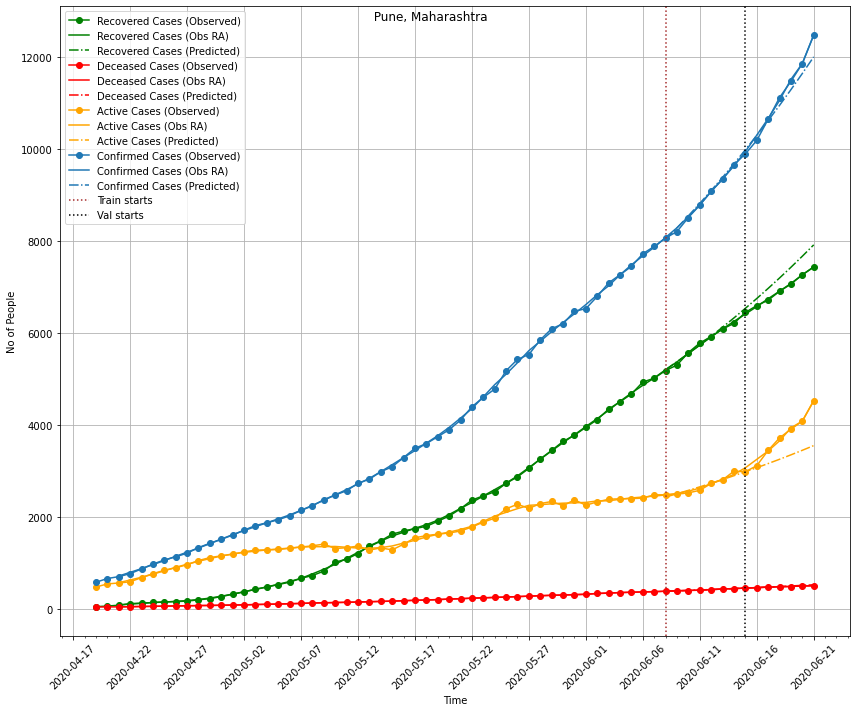

In [99]:
for state, district in districts_to_show:
    predictions_dict[(state, district)] = {}
    predictions_dict[(state, district)]['m1'] = single_fitting_cycle(
        dataframes, state, district, data_from_tracker=data_from_tracker, granular_data=False, filename=filename, #Data
        model=SIRD, variable_param_ranges=variable_param_ranges, #Choose Model and Ranges
        train_period=7, val_period=7, num_evals=1000, initialisation='intermediate', #Optimisation related parameters
        which_compartments=which_compartments, #Compartments to Apply Loss on 
        smooth_jump=False, smoothing_length=33, smoothing_method='weighted') #Smoothing
    
    predictions_dict[(state, district)]['state'] = state
    predictions_dict[(state, district)]['dist'] = district
    predictions_dict[(state, district)]['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    predictions_dict[(state, district)]['datasource'] = 'covid19api' if predictions_dict[(state, district)]['m1']['data_from_tracker'] else 'municipality'
    predictions_dict[(state, district)]['variable_param_ranges'] = predictions_dict[(state, district)]['m1']['variable_param_ranges']

In [100]:
lc.create_loss_dataframe_master(predictions_dict, 'm1')

train                                            val  \
                 hospitalised total_infected deceased recovered hospitalised   
Maharashtra Pune         1.59           0.44     0.55      0.77        12.44   

                                                    
                 total_infected deceased recovered  
Maharashtra Pune            1.6      1.5      3.94

Performing m1 fit ..
fetching from athenadb...
splitting data ..
splitting data ..
train
           state district       date  total_infected  hospitalised  recovered  \
50  maharashtra     pune 2020-06-10          8527.0        2565.4     5554.0   
51  maharashtra     pune 2020-06-11          8781.8        2630.2     5734.4   
52  maharashtra     pune 2020-06-12          9072.0        2730.2     5915.6   
53  maharashtra     pune 2020-06-13          9348.2        2821.8     6089.8   
54  maharashtra     pune 2020-06-14          9629.4        2929.0     6252.6   

    deceased  
50     407.6  
51     417.2  
52     426.2  
53     436.6  
54     447.8  
val
          state district       date  total_infected  hospitalised  recovered  \
0  maharashtra     pune 2020-06-15          9941.6        3072.2     6410.4   
1  maharashtra     pune 2020-06-16         10297.4        3254.6     6574.2   
2  maharashtra     pune 2020-06-17         10659.2        3436.8     6744.8   
3  maharashtra    

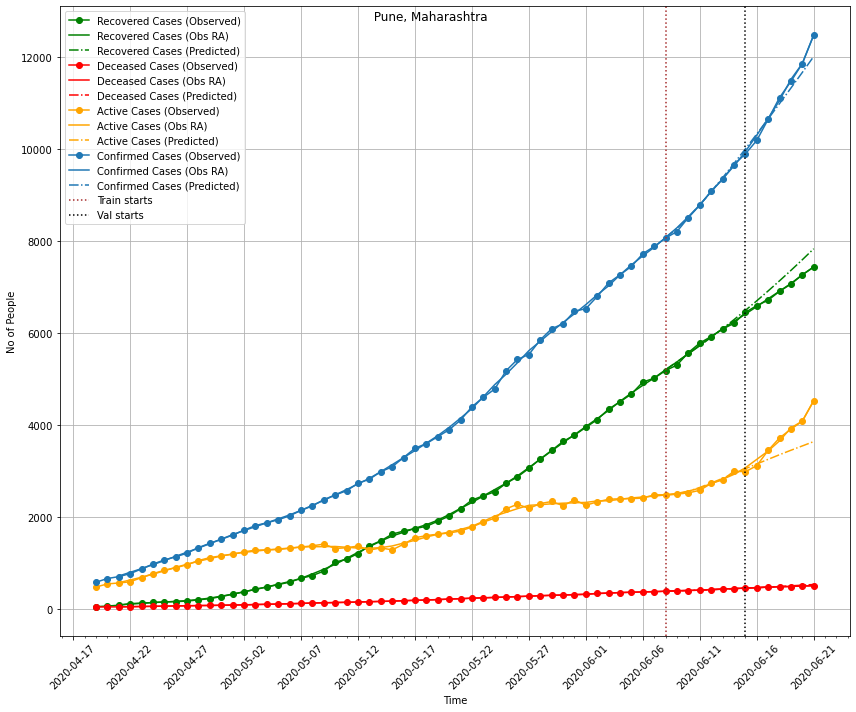

In [101]:
for state, district in districts_to_show:
    predictions_dict[(state, district)] = {}
    predictions_dict[(state, district)]['m1'] = single_fitting_cycle(
        dataframes, state, district, data_from_tracker=data_from_tracker, granular_data=False, filename=filename, #Data
        model=SEIR_Testing, variable_param_ranges=None, #Choose Model and Ranges
        train_period=7, val_period=7, num_evals=1000, initialisation='intermediate', #Optimisation related parameters
        which_compartments=which_compartments, #Compartments to Apply Loss on 
        smooth_jump=False, smoothing_length=33, smoothing_method='weighted') #Smoothing
    
    predictions_dict[(state, district)]['state'] = state
    predictions_dict[(state, district)]['dist'] = district
    predictions_dict[(state, district)]['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    predictions_dict[(state, district)]['datasource'] = 'covid19api' if predictions_dict[(state, district)]['m1']['data_from_tracker'] else 'municipality'
    predictions_dict[(state, district)]['variable_param_ranges'] = predictions_dict[(state, district)]['m1']['variable_param_ranges']

In [102]:
lc.create_loss_dataframe_master(predictions_dict, 'm1')

train                                            val  \
                 hospitalised total_infected deceased recovered hospitalised   
Maharashtra Pune         1.01           0.27     0.58       0.7        10.42   

                                                    
                 total_infected deceased recovered  
Maharashtra Pune            1.5     1.93       3.1

### Hospitalised and total infected

In [103]:
variable_param_ranges = {
    'lockdown_R0': (1, 3),
    'T_inc': (4, 8),
    'T_inf': (4, 50),
    'T_fatal': (1, 150),
    'I_hosp_ratio': (0, 2)
}
variable_param_ranges = get_variable_param_ranges(variable_param_ranges)
which_compartments=['hospitalised', 'total_infected']

Performing m1 fit ..
fetching from athenadb...
splitting data ..
splitting data ..
train
           state district       date  total_infected  hospitalised  recovered  \
50  maharashtra     pune 2020-06-10          8527.0        2565.4     5554.0   
51  maharashtra     pune 2020-06-11          8781.8        2630.2     5734.4   
52  maharashtra     pune 2020-06-12          9072.0        2730.2     5915.6   
53  maharashtra     pune 2020-06-13          9348.2        2821.8     6089.8   
54  maharashtra     pune 2020-06-14          9629.4        2929.0     6252.6   

    deceased  
50     407.6  
51     417.2  
52     426.2  
53     436.6  
54     447.8  
val
          state district       date  total_infected  hospitalised  recovered  \
0  maharashtra     pune 2020-06-15          9941.6        3072.2     6410.4   
1  maharashtra     pune 2020-06-16         10297.4        3254.6     6574.2   
2  maharashtra     pune 2020-06-17         10659.2        3436.8     6744.8   
3  maharashtra    

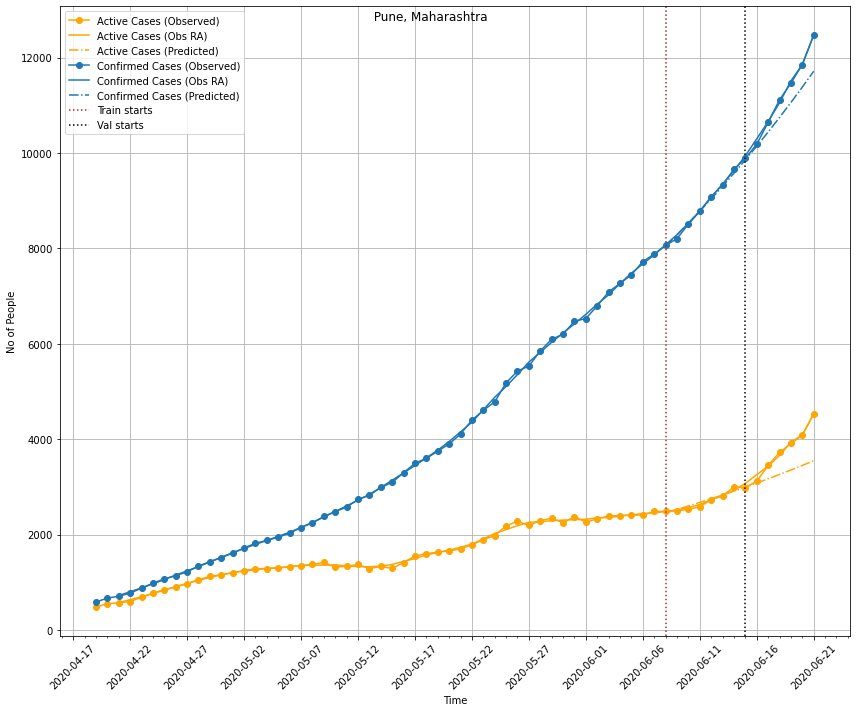

In [104]:
for state, district in districts_to_show:
    predictions_dict[(state, district)] = {}
    predictions_dict[(state, district)]['m1'] = single_fitting_cycle(
        dataframes, state, district, data_from_tracker=data_from_tracker, granular_data=False, filename=filename, #Data
        model=SIRD, variable_param_ranges=variable_param_ranges, #Choose Model and Ranges
        train_period=7, val_period=7, num_evals=1000, initialisation='intermediate', #Optimisation related parameters
        which_compartments=which_compartments, #Compartments to Apply Loss on 
        smooth_jump=False, smoothing_length=33, smoothing_method='weighted') #Smoothing
    
    predictions_dict[(state, district)]['state'] = state
    predictions_dict[(state, district)]['dist'] = district
    predictions_dict[(state, district)]['fitting_date'] = datetime.datetime.now().strftime("%Y-%m-%d")
    predictions_dict[(state, district)]['datasource'] = 'covid19api' if predictions_dict[(state, district)]['m1']['data_from_tracker'] else 'municipality'
    predictions_dict[(state, district)]['variable_param_ranges'] = predictions_dict[(state, district)]['m1']['variable_param_ranges']